In [1]:
# Essential Libraries
import os
import sys
import numpy as np
import pandas as pd
import datetime
import random

# DL
import tensorflow as tf
import keras

# Plots
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)
sns.set_style("whitegrid");
sns.set_color_codes(palette='pastel');

# Display options
pd.set_option('display.max_columns', None);
pd.options.display.max_seq_items = 8000;
pd.options.display.max_rows = 8000;
%precision 6

# Ignore Warnings
import warnings
warnings.filterwarnings(action="ignore")

# Define data and image directory
PROJECT_ROOT_DIR = "."
DATA_DIR = os.path.join(PROJECT_ROOT_DIR, "data")
IMAGE_DIR = os.path.join(PROJECT_ROOT_DIR, "img")

from IPython.display import Image
for d in [DATA_DIR, IMAGE_DIR]:
    if not os.path.exists(d):
        os.mkdir(d)

# Define a function to save images
def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = os.path.join(IMAGE_DIR, fig_id + "." + fig_extension)
    print("Saving figure", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)

## 1. Loading the Data

In [2]:
cc_info = pd.read_csv('cc_info.csv')
transactions = pd.read_csv('transactions.csv')

cc_info.head()

,credit_card,city,state,zipcode,credit_card_limit
0,1280981422329509,Dallas,PA,18612,6000
1,9737219864179988,Houston,PA,15342,16000
2,4749889059323202,Auburn,MA,1501,14000
3,9591503562024072,Orlando,WV,26412,18000
4,2095640259001271,New York,NY,10001,20000


In [3]:
transactions.head()

,credit_card,date,transaction_dollar_amount,Long,Lat
0,1003715054175576,2015-09-11 00:32:40,43.78,-80.174132,40.267370
1,1003715054175576,2015-10-24 22:23:08,103.15,-80.194240,40.180114
2,1003715054175576,2015-10-26 18:19:36,48.55,-80.211033,40.313004
3,1003715054175576,2015-10-22 19:41:10,136.18,-80.174138,40.290895
4,1003715054175576,2015-10-26 20:08:22,71.82,-80.238720,40.166719


In [4]:
transactions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 294588 entries, 0 to 294587
Data columns (total 5 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   credit_card                294588 non-null  int64  
 1   date                       294588 non-null  object 
 2   transaction_dollar_amount  294588 non-null  float64
 3   Long                       294588 non-null  float64
 4   Lat                        294588 non-null  float64
dtypes: float64(3), int64(1), object(1)
memory usage: 11.2+ MB


Converting the 'date' column to datetime object:

In [5]:
transactions['date'] = pd.to_datetime(transactions['date'])
transactions.head()

,credit_card,date,transaction_dollar_amount,Long,Lat
0,1003715054175576,2015-09-11 00:32:40,43.78,-80.174132,40.267370
1,1003715054175576,2015-10-24 22:23:08,103.15,-80.194240,40.180114
2,1003715054175576,2015-10-26 18:19:36,48.55,-80.211033,40.313004
3,1003715054175576,2015-10-22 19:41:10,136.18,-80.174138,40.290895
4,1003715054175576,2015-10-26 20:08:22,71.82,-80.238720,40.166719


In [6]:
transactions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 294588 entries, 0 to 294587
Data columns (total 5 columns):
 #   Column                     Non-Null Count   Dtype         
---  ------                     --------------   -----         
 0   credit_card                294588 non-null  int64         
 1   date                       294588 non-null  datetime64[ns]
 2   transaction_dollar_amount  294588 non-null  float64       
 3   Long                       294588 non-null  float64       
 4   Lat                        294588 non-null  float64       
dtypes: datetime64[ns](1), float64(3), int64(1)
memory usage: 11.2 MB


### Merging Datasets for Transaction history and Credit Card information

In [7]:
data = pd.merge(transactions, cc_info, how="left", on='credit_card')
data.head()

,credit_card,date,transaction_dollar_amount,Long,Lat,city,state,zipcode,credit_card_limit
0,1003715054175576,2015-09-11 00:32:40,43.78,-80.174132,40.267370,Houston,PA,15342,20000
1,1003715054175576,2015-10-24 22:23:08,103.15,-80.194240,40.180114,Houston,PA,15342,20000
2,1003715054175576,2015-10-26 18:19:36,48.55,-80.211033,40.313004,Houston,PA,15342,20000
3,1003715054175576,2015-10-22 19:41:10,136.18,-80.174138,40.290895,Houston,PA,15342,20000
4,1003715054175576,2015-10-26 20:08:22,71.82,-80.238720,40.166719,Houston,PA,15342,20000


In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 294588 entries, 0 to 294587
Data columns (total 9 columns):
 #   Column                     Non-Null Count   Dtype         
---  ------                     --------------   -----         
 0   credit_card                294588 non-null  int64         
 1   date                       294588 non-null  datetime64[ns]
 2   transaction_dollar_amount  294588 non-null  float64       
 3   Long                       294588 non-null  float64       
 4   Lat                        294588 non-null  float64       
 5   city                       294588 non-null  object        
 6   state                      294588 non-null  object        
 7   zipcode                    294588 non-null  int64         
 8   credit_card_limit          294588 non-null  int64         
dtypes: datetime64[ns](1), float64(3), int64(3), object(2)
memory usage: 22.5+ MB


## 2. Exploratory Data Analysis

### Checking for missing values:

In [9]:
data.isnull().sum()

credit_card                  0
date                         0
transaction_dollar_amount    0
Long                         0
Lat                          0
city                         0
state                        0
zipcode                      0
credit_card_limit            0
dtype: int64

### Number of unique Credit Cards:

In [10]:
data['credit_card'].nunique()

984

In [11]:
len(data['credit_card'].value_counts())

984

### Transaction for individual Cards across City, State, Zipcode

 - For a given Card, How many cities, states, and zipcodes has it been used in?
 - Is the CC Limit constant for each Credit card for the given time duration?

In [12]:
grouped_data = data.groupby('credit_card')[['city', 'state', 'zipcode', 'credit_card_limit']].agg(['count', 'nunique'])
grouped_data

city         state         zipcode          \
                 count nunique count nunique   count nunique   
credit_card                                                    
1003715054175576   261       1   261       1     261       1   
1013870087888817   341       1   341       1     341       1   
1023820165155391   525       1   525       1     525       1   
1073931538936472    47       1    47       1      47       1   
1077622576192810    13       1    13       1      13       1   
1087468642191606    79       1    79       1      79       1   
1089479586475600   428       1   428       1     428       1   
1101164752077181   213       1   213       1     213       1   
1106824181265726   217       1   217       1     217       1   
1107936587129946   400       1   400       1     400       1   
1126571863414211   581       1   581       1     581       1   
1128536627506856   473       1   473       1     473       1   
1134742235676586   272       1   272       1     272       1   
1137926374621536   329       1   329       1     329       1   
1144894232607400   630       1   630       1     630       1   
1155726765596507    42       1    42       1      42       1   
1156998467006869   411       1   411       1     411       1   
1165413984579076   220       1   220       1     220       1   
1167475218806361   387       1   387       1     387       1   
1169271395749970   328       1   328       1     328       1   
1175962294549313   592       1   592       1     592       1   
1190980117697422   401       1   401       1     401       1   
1191702776174515   564       1   564       1     564       1   
1210872963953886   169       1   169       1     169       1   
1221421251374063   341       1   341       1     341       1   
1222730774437945    27       1    27       1      27       1   
1224132812823172   271       1   271       1     271       1   
1228288249952859   554       1   554       1     554       1   
1246716439259317   579       1   579       1     579       1   
1250832548098023    23       1    23       1      23       1   
1254472912142815   483       1   483       1     483       1   
1261411767321605   477       1   477       1     477       1   
1264384810841217   256       1   256       1     256       1   
1280981422329509   316       1   316       1     316       1   
1281918894315694    16       1    16       1      16       1   
1284450389976622    53       1    53       1      53       1   
1295205764436116   320       1   320       1     320       1   
1301519430111888   240       1   240       1     240       1   
1312823087473107   571       1   571       1     571       1   
1326817464191542   234       1   234       1     234       1   
1337293370722685   175       1   175       1     175       1   
1363526625562684   331       1   331       1     331       1   
1368742094369263   411       1   411       1     411       1   
1375199270298437   100       1   100       1     100       1   
1380553699881195   443       1   443       1     443       1   
1388343943378591   598       1   598       1     598       1   
1402909379316770   486       1   486       1     486       1   
1409322756311484   422       1   422       1     422       1   
1420382222148431    68       1    68       1      68       1   
1428403246999020   382       1   382       1     382       1   
1459700728665333    43       1    43       1      43       1   
1460880989446247   505       1   505       1     505       1   
1461675388467265    69       1    69       1      69       1   
1464551767416747    50       1    50       1      50       1   
1468686791689484   329       1   329       1     329       1   
1475826831184689   586       1   586       1     586       1   
1488824811225438   553       1   553       1     553       1   
1489635379898079   186       1   186       1     186       1   
1492903951796501   110       1   110       1     110       1   
1498307521782517   445       1   445       1     4

In [13]:
len(grouped_data)

984

In [14]:
grouped_data['city']['nunique'].value_counts()

1    984
Name: nunique, dtype: int64

In [15]:
for var in ['city', 'state', 'zipcode', 'credit_card_limit']:
    print(grouped_data[var]['nunique'].value_counts())

1    984
Name: nunique, dtype: int64
1    984
Name: nunique, dtype: int64
1    984
Name: nunique, dtype: int64
1    984
Name: nunique, dtype: int64


## Observation:
 - For each transaction for a given Credit card, the City, State, Zipcode and CC Limits are always same.
 - Hence we can drop these columns from our analysis down the line.

### Transaction history for a given card:
 - We would like to study the transaction history of a given card.
 - Let's take a look at the top 5 cards with highest number of transactions.

In [16]:
data['credit_card'].value_counts()[:5]

2239759218122779    667
3015736744626726    657
5059189477453448    655
3824313030996787    653
4569281393242605    653
Name: credit_card, dtype: int64

 - Let's select the card with highest number of transaction for further analysis.

In [17]:
df = data[data['credit_card'] == 2239759218122779]
df.drop(['credit_card', 'city', 'state', 'zipcode', 'credit_card_limit'], axis = 1, inplace = True)
df.reset_index(inplace=True, drop = True)
df.head()

,date,transaction_dollar_amount,Long,Lat
0,2015-08-23 00:33:34,35.89,-72.037238,43.238060
1,2015-08-24 22:26:59,86.66,-72.056303,43.207306
2,2015-10-23 20:47:42,853.64,-72.017632,43.186785
3,2015-09-17 21:13:40,80.59,-72.146687,43.205348
4,2015-08-17 22:42:50,38.05,-72.128925,43.145172


In [18]:
df.sort_values(by='date', inplace = True)
df2 = df.set_index('date')
df2.head()

,transaction_dollar_amount,Long,Lat
date,,,
2015-07-31 15:28:21,17.48,-72.054130,43.188014
2015-07-31 19:28:00,28.76,-72.086599,43.202413
2015-07-31 19:54:24,63.62,-72.099320,43.238511
2015-07-31 20:14:58,53.96,-72.017289,43.133478
2015-07-31 20:44:08,119.52,-72.049619,43.202152


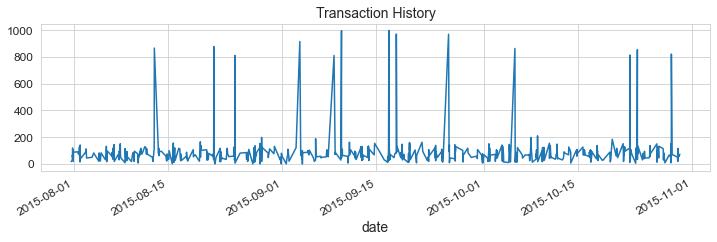

In [19]:
fig, ax = plt.subplots(figsize = (12, 3))

df2['transaction_dollar_amount'].plot()
plt.title('Transaction History', fontsize = 14)
plt.show()

### Uni-variate Analysis

In [20]:
data = df2.copy()

# Let's construct a function that shows the summary and density distribution of a numerical attribute:
def summary(x):
    x_min = data[x].min()
    x_max = data[x].max()
    Q1 = data[x].quantile(0.25)
    Q2 = data[x].quantile(0.50)
    Q3 = data[x].quantile(0.75)
    print(f'5 Point Summary of {x.capitalize()} Attribute:\n'
          f'{x.capitalize()}(min) : {x_min}\n'
          f'Q1                    : {Q1}\n'
          f'Q2(Median)            : {Q2}\n'
          f'Q3                    : {Q3}\n'
          f'{x.capitalize()}(max) : {x_max}')

    fig = plt.figure(figsize=(16, 10))
    plt.subplots_adjust(hspace = 0.6)
    sns.set_palette('pastel')
    
    plt.subplot(221)
    ax1 = sns.distplot(data[x], color = 'r')
    plt.title(f'{x.capitalize()} Density Distribution')
    
    plt.subplot(222)
    ax2 = sns.violinplot(x = data[x], palette = 'Accent', split = True)
    plt.title(f'{x.capitalize()} Violinplot')
    
    plt.subplot(223)
    ax2 = sns.boxplot(x=data[x], palette = 'cool', width=0.7, linewidth=0.6)
    plt.title(f'{x.capitalize()} Boxplot')
    
    plt.subplot(224)
    ax3 = sns.kdeplot(data[x], cumulative=True)
    plt.title(f'{x.capitalize()} Cumulative Density Distribution')
    
    plt.show()

5 Point Summary of Transaction_dollar_amount Attribute:
Transaction_dollar_amount(min) : 0.17
Q1                    : 43.535
Q2(Median)            : 69.07
Q3                    : 96.39
Transaction_dollar_amount(max) : 998.27


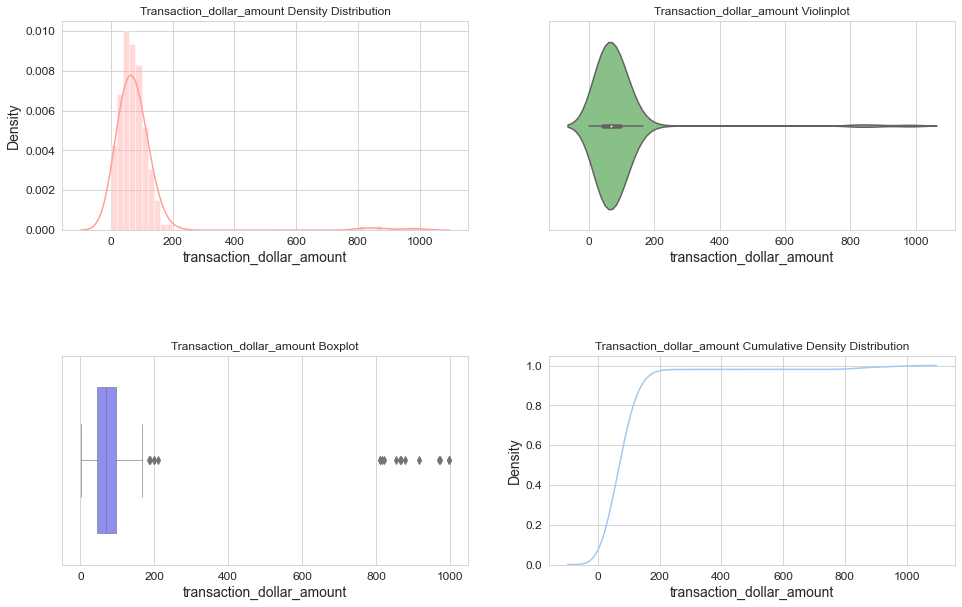

In [21]:
summary('transaction_dollar_amount')

5 Point Summary of Lat Attribute:
Lat(min) : -40.030565666951794
Q1                    : 43.13374559211085
Q2(Median)            : 43.17189002727061
Q3                    : 43.21010981122255
Lat(max) : 63.203768348145104


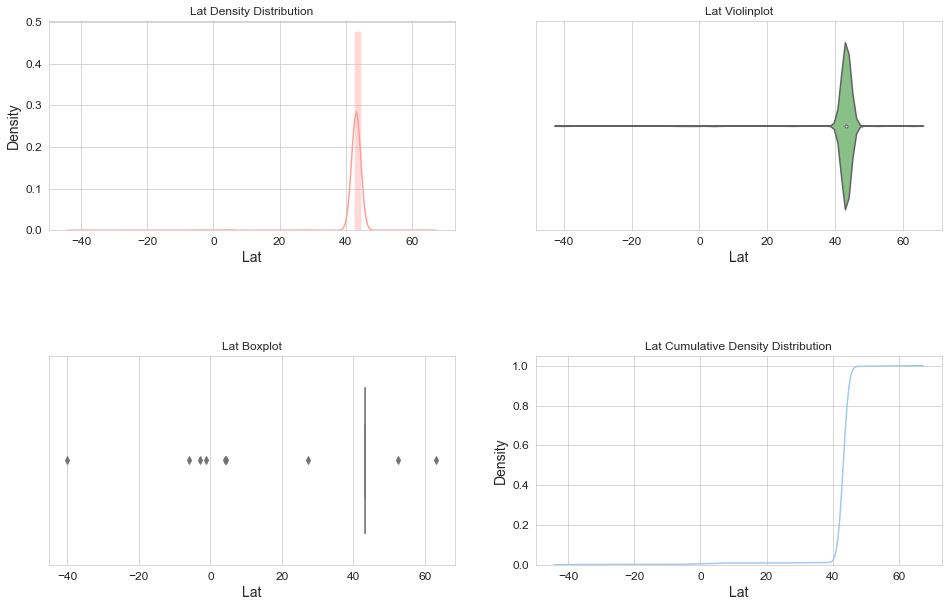

In [22]:
summary('Lat')

5 Point Summary of Long Attribute:
Long(min) : -72.18468698738809
Q1                    : -72.1328419154991
Q2(Median)            : -72.09382055824021
Q3                    : -72.06132738793819
Long(max) : 145.752737364378


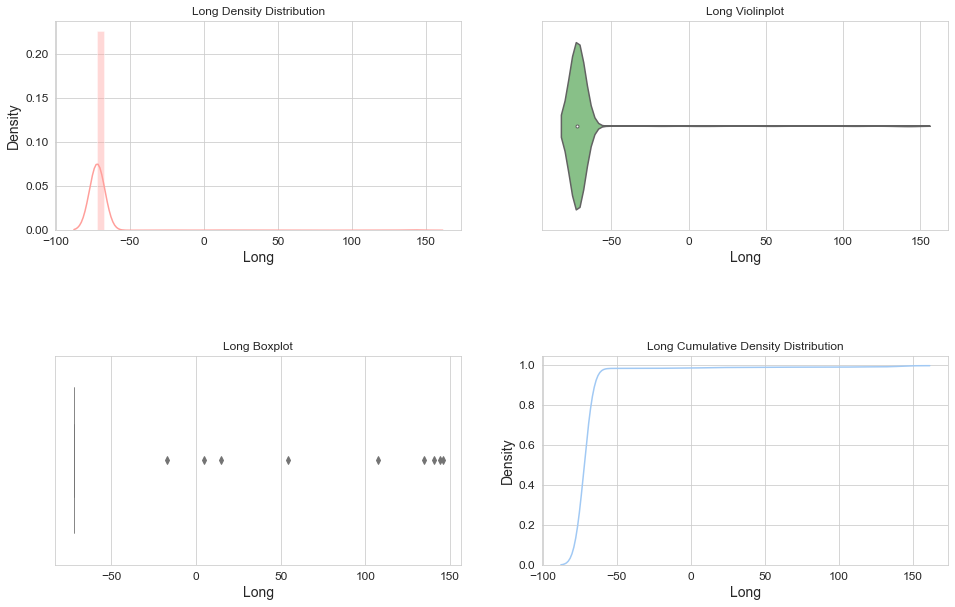

In [23]:
summary('Long')

## 3.Feature Engineering

In [24]:
# the hours and if it's night or day (7:00-22:00)
df['hours'] = df['date'].dt.hour
df['daylight'] = ((df['hours'] >= 7) & (df['hours'] <= 22)).astype(int)

In [25]:
df.head()

,date,transaction_dollar_amount,Long,Lat,hours,daylight
111,2015-07-31 15:28:21,17.48,-72.054130,43.188014,15,1
402,2015-07-31 19:28:00,28.76,-72.086599,43.202413,19,1
395,2015-07-31 19:54:24,63.62,-72.099320,43.238511,19,1
661,2015-07-31 20:14:58,53.96,-72.017289,43.133478,20,1
6,2015-07-31 20:44:08,119.52,-72.049619,43.202152,20,1


In [26]:
# the day of the week (Monday=0, Sunday=6) and if it's a week end day or week day.
df['DayOfTheWeek'] = df['date'].dt.dayofweek
df['WeekDay'] = (df['DayOfTheWeek'] < 5).astype(int)
# An estimation of anomly population of the dataset (necessary for several algorithm)
outliers_fraction = 0.1

In [27]:
# time with int to plot easily
df['time_epoch'] = (df['date'].astype(np.int64)/100000000000).astype(np.int64)

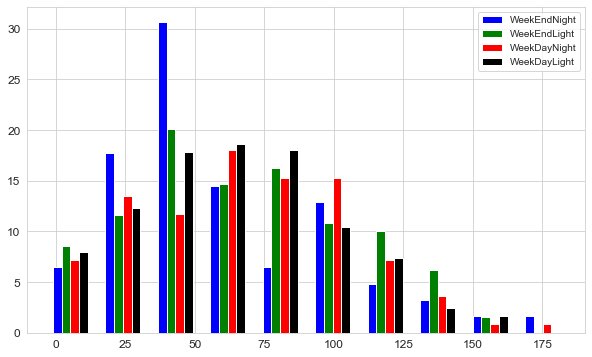

In [28]:
# creation of 4 distinct categories that seem useful (week end/day week & night/day)
df['categories'] = df['WeekDay']*2 + df['daylight']

a = df.loc[df['categories'] == 0, 'transaction_dollar_amount']
b = df.loc[df['categories'] == 1, 'transaction_dollar_amount']
c = df.loc[df['categories'] == 2, 'transaction_dollar_amount']
d = df.loc[df['categories'] == 3, 'transaction_dollar_amount']

fig, ax = plt.subplots(figsize = (10, 6))
a_heights, a_bins = np.histogram(a)
b_heights, b_bins = np.histogram(b, bins=a_bins)
c_heights, c_bins = np.histogram(c, bins=a_bins)
d_heights, d_bins = np.histogram(d, bins=a_bins)

width = (a_bins[1] - a_bins[0])/6

ax.bar(a_bins[:-1], a_heights*100/a.count(), width=width, facecolor='blue', label='WeekEndNight')
ax.bar(b_bins[:-1]+width, (b_heights*100/b.count()), width=width, facecolor='green', label ='WeekEndLight')
ax.bar(c_bins[:-1]+width*2, (c_heights*100/c.count()), width=width, facecolor='red', label ='WeekDayNight')
ax.bar(d_bins[:-1]+width*3, (d_heights*100/d.count()), width=width, facecolor='black', label ='WeekDayLight')

plt.legend()
plt.show()

In [29]:
df.head()

,date,transaction_dollar_amount,Long,Lat,hours,daylight,DayOfTheWeek,WeekDay,time_epoch,categories
111,2015-07-31 15:28:21,17.48,-72.054130,43.188014,15,1,4,1,14383565,3
402,2015-07-31 19:28:00,28.76,-72.086599,43.202413,19,1,4,1,14383708,3
395,2015-07-31 19:54:24,63.62,-72.099320,43.238511,19,1,4,1,14383724,3
661,2015-07-31 20:14:58,53.96,-72.017289,43.133478,20,1,4,1,14383736,3
6,2015-07-31 20:44:08,119.52,-72.049619,43.202152,20,1,4,1,14383754,3


## 4 Model Building
## 4.1 Clustering
Use for collective anomalies (unordered).
We group together the usual combination of features. The points that are far from the cluster are points with usual combination of features.We consider those points as anomalies.

In [30]:
from sklearn import preprocessing
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.covariance import EllipticEnvelope
from sklearn.ensemble import IsolationForest
from sklearn.svm import OneClassSVM

In [31]:
# Take useful feature and standardize them
data = df[['transaction_dollar_amount', 'Long', 'Lat', 'hours', 'daylight', 'DayOfTheWeek', 'WeekDay']]


pca = PCA()

pca_transformer = Pipeline(steps=[
    ('scaler', StandardScaler()),
    ('pca', PCA())])

X_pca = pca_transformer.fit_transform(data)

In [32]:
print(pca_transformer.named_steps["pca"].explained_variance_ratio_)

[0.271806 0.245456 0.218997 0.136543 0.047367 0.042919 0.036911]


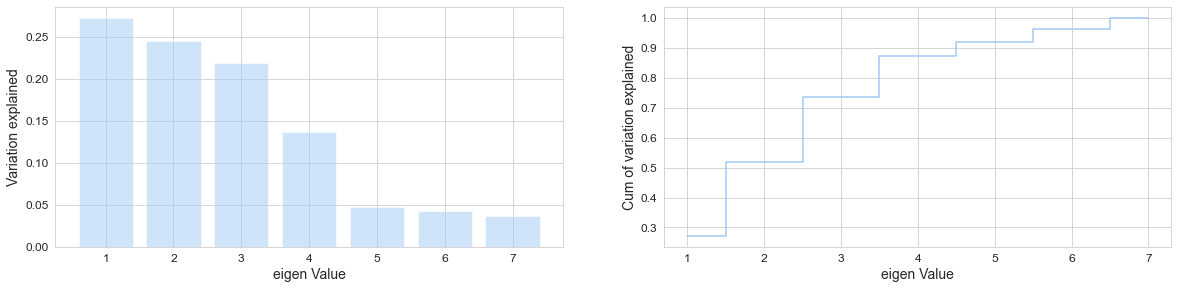

In [33]:
explained_variance_ratio = pca_transformer.named_steps["pca"].explained_variance_ratio_

plt.figure(figsize= (20,15))

plt.subplot(3, 2, 1)
plt.bar(list(range(1,8)), explained_variance_ratio, alpha=0.5, align='center')
plt.ylabel('Variation explained')
plt.xlabel('eigen Value')

plt.subplot(3, 2, 2)
plt.step(list(range(1,8)), np.cumsum(explained_variance_ratio), where='mid')
plt.ylabel('Cum of variation explained')
plt.xlabel('eigen Value')
plt.show()

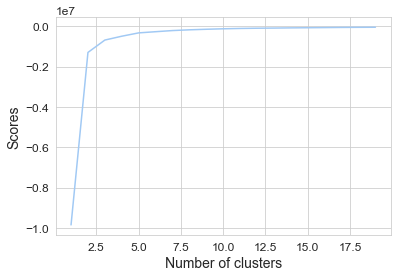

In [34]:
# calculate with different number of centroids to see the loss plot (elbow method)
n_cluster = range(1, 20)
kmeans = [KMeans(n_clusters=i).fit(data) for i in n_cluster]
scores = [kmeans[i].score(data) for i in range(len(kmeans))]
fig, ax = plt.subplots()
ax.plot(n_cluster, scores)
plt.ylabel('Scores')
plt.xlabel('Number of clusters')
plt.show()

In [35]:
# Not clear for me, I choose 8 centroids arbitrarily and add these data to the central dataframe

pca_transformer = Pipeline(steps=[
    ('scaler', StandardScaler()),
    ('pca', PCA(n_components = 2))])

df['principal_feature1'] = pca_transformer.fit_transform(data)[:, 0]
df['principal_feature2'] = pca_transformer.fit_transform(data)[:, 1]
df['cluster'] = kmeans[8].predict(data)
df['cluster'].value_counts()

4    178
2    176
7    127
5    112
0     56
1      8
3      5
6      4
8      1
Name: cluster, dtype: int64

In [36]:
df.head()

,date,transaction_dollar_amount,Long,Lat,hours,daylight,DayOfTheWeek,WeekDay,time_epoch,categories,principal_feature1,principal_feature2,cluster
111,2015-07-31 15:28:21,17.48,-72.054130,43.188014,15,1,4,1,14383565,3,0.219855,-0.319773,5
402,2015-07-31 19:28:00,28.76,-72.086599,43.202413,19,1,4,1,14383708,3,0.449341,-0.374442,5
395,2015-07-31 19:54:24,63.62,-72.099320,43.238511,19,1,4,1,14383724,3,0.477058,-0.325403,4
661,2015-07-31 20:14:58,53.96,-72.017289,43.133478,20,1,4,1,14383736,3,0.529049,-0.341113,2
6,2015-07-31 20:44:08,119.52,-72.049619,43.202152,20,1,4,1,14383754,3,0.581073,-0.249288,7


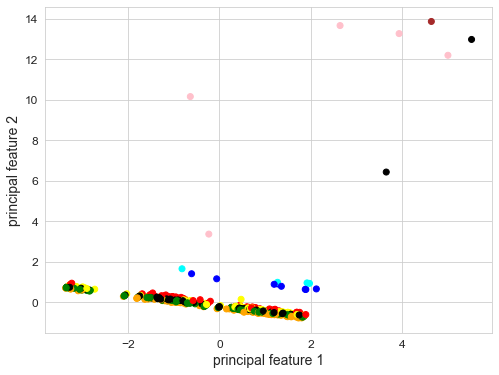

In [37]:
#plot the different clusters with the 2 main features
fig, ax = plt.subplots(figsize = (8,6))
colors = {0:'red', 1:'blue', 2:'green', 3:'pink', 4:'black', 5:'orange', 6:'cyan', 7:'yellow', 8:'brown'}
ax.scatter(df['principal_feature1'], df['principal_feature2'], c=df["cluster"].apply(lambda x: colors[x]))
plt.ylabel('principal feature 2')
plt.xlabel('principal feature 1')
plt.show()

## 4.2 RNN

Used for sequential anomalies (ordered).

RNN learns to recognize sequence in the data and then make prediction based on the previous sequence. We consider an anomaly when the next data points are distant from RNN prediction. Aggregation, size of sequence and size of prediction for anomaly are important parameters to have relevant detection.
Here we make learn from 50 previous values, and we predict just the 1 next value.

In [38]:
#select and standardize data
data_n = df[['transaction_dollar_amount', 'Long', 'Lat', 'hours', 'daylight', 'DayOfTheWeek', 'WeekDay']]
min_max_scaler = preprocessing.StandardScaler()
np_scaled = min_max_scaler.fit_transform(data_n)
data_n = pd.DataFrame(np_scaled)

# important parameters and train/test size
prediction_time = 1 
testdatasize = 50
unroll_length = 10
testdatacut = testdatasize + unroll_length  + 1

#train data
x_train = data_n[0:-prediction_time-testdatacut].to_numpy()
y_train = data_n[prediction_time:-testdatacut  ][0].to_numpy()

# test data
x_test = data_n[0-testdatacut:-prediction_time].to_numpy()
y_test = data_n[prediction_time-testdatacut:  ][0].to_numpy()

In [39]:
#unroll: create sequence of 50 previous data points for each data points
def unroll(data,sequence_length=24):
    result = []
    for index in range(len(data) - sequence_length):
        result.append(data[index: index + sequence_length])
    return np.asarray(result)

# adapt the datasets for the sequence data shape
x_train = unroll(x_train,unroll_length)
x_test  = unroll(x_test,unroll_length)
y_train = y_train[-x_train.shape[0]:]
y_test  = y_test[-x_test.shape[0]:]

# see the shape
print("x_train", x_train.shape)
print("y_train", y_train.shape)
print("x_test", x_test.shape)
print("y_test", y_test.shape)

x_train (595, 10, 7)
y_train (595,)
x_test (50, 10, 7)
y_test (50,)


In [40]:
# specific libraries for RNN
# keras is a high layer build on Tensorflow layer to stay in high level/easy implementation
from keras.layers.core import Dense, Activation, Dropout
from keras.layers.recurrent import LSTM
from keras.models import Sequential
import time #helper libraries
from keras.models import model_from_json

In [41]:
# Build the model
model = Sequential()

model.add(LSTM(100,
    input_dim=x_train.shape[-1],
    return_sequences=True))
model.add(Dropout(0.2))

model.add(LSTM(
    100,
    return_sequences=False))
model.add(Dropout(0.2))

model.add(Dense(
    units=1))
model.add(Activation('linear'))

start = time.time()
model.compile(loss='mse', optimizer='rmsprop')
print('compilation time : {}'.format(time.time() - start))

compilation time : 0.0


In [42]:
# Train the model
#nb_epoch = 350

model.fit(
    x_train,
    y_train,
    batch_size=100,
    epochs=50,
    validation_split=0.1)

Epoch 1/50
6/6 [==============================] - 4s 289ms/step - loss: 1.0140 - val_loss: 0.7090
Epoch 2/50
6/6 [==============================] - 0s 16ms/step - loss: 1.0879 - val_loss: 0.7266
Epoch 3/50
6/6 [==============================] - 0s 13ms/step - loss: 1.2505 - val_loss: 0.7224
Epoch 4/50
6/6 [==============================] - 0s 17ms/step - loss: 0.8853 - val_loss: 0.7145
Epoch 5/50
6/6 [==============================] - 0s 16ms/step - loss: 1.0817 - val_loss: 0.7400
Epoch 6/50
6/6 [==============================] - 0s 17ms/step - loss: 0.9748 - val_loss: 0.7231
Epoch 7/50
6/6 [==============================] - 0s 16ms/step - loss: 1.1396 - val_loss: 0.7232
Epoch 8/50
6/6 [==============================] - 0s 17ms/step - loss: 1.1299 - val_loss: 0.7244
Epoch 9/50
6/6 [==============================] - 0s 17ms/step - loss: 1.1291 - val_loss: 0.7430
Epoch 10/50
6/6 [==============================] - 0s 17ms/step - loss: 1.0416 - val_loss: 0.7332
Epoch 11/50
6/6 [===========

In [43]:
# serialize model to JSON
model_json = model.to_json()
with open("model.json", "w") as json_file:
    json_file.write(model_json)
# serialize weights to HDF5
model.save_weights("model.h5")
print("Saved model to disk")

Saved model to disk


In [44]:
# load json and create model
json_file = open('model.json', 'r')
loaded_model_json = json_file.read()
json_file.close()
loaded_model = model_from_json(loaded_model_json)
# load weights into new model
loaded_model.load_weights("model.h5")
print("Loaded model from disk")

Loaded model from disk


In [45]:
# create the list of difference between prediction and test data
loaded_model = model
diff=[]
ratio=[]
p = loaded_model.predict(x_test)
# predictions = lstm.predict_sequences_multiple(loaded_model, x_test, 50, 50)
for u in range(len(y_test)):
    pr = p[u][0]
    ratio.append((y_test[u]/pr)-1)
    diff.append(abs(y_test[u]- pr))

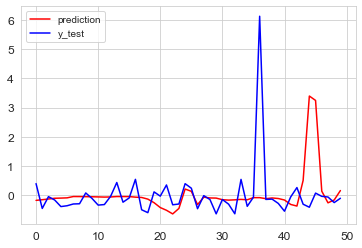

In [46]:
# plot the prediction and the reality (for the test data)
fig, axs = plt.subplots()
axs.plot(p,color='red', label='prediction')
axs.plot(y_test,color='blue', label='y_test')
plt.legend(loc='upper left')
plt.show()

In [47]:
# select the most distant prediction/reality data points as anomalies
diff = pd.Series(diff)
number_of_outliers = int(outliers_fraction*len(diff))
threshold = diff.nlargest(number_of_outliers).min()
# data with anomaly label (test data part)
test = (diff >= threshold).astype(int)
# the training data part where we didn't predict anything (overfitting possible): no anomaly
complement = pd.Series(0, index=np.arange(len(data_n)-testdatasize))
# # add the data to the main
df['anomaly'] = complement.append(test, ignore_index='True')
print(df['anomaly'].value_counts())

0    662
1      5
Name: anomaly, dtype: int64


## Observation:
As we can see, based on our selected threshold, we have 5 anomalous data points. Which are these points?

In [49]:
df.loc[df['anomaly'] == 1]

,date,transaction_dollar_amount,Long,Lat,hours,daylight,DayOfTheWeek,WeekDay,time_epoch,categories,principal_feature1,principal_feature2,cluster,anomaly
661,2015-07-31 20:14:58,53.96,-72.017289,43.133478,20,1,4,1,14383736,3,0.529049,-0.341113,2,1
638,2015-08-10 17:51:39,54.26,-72.104016,43.162986,17,1,0,1,14392290,3,1.553945,-0.618607,2,1
660,2015-08-28 22:57:28,89.69,-72.040620,43.127159,22,1,4,1,14408026,3,0.669538,-0.320151,4,1
662,2015-09-19 23:20:30,160.77,-72.098614,43.247760,23,0,5,0,14427048,0,-1.685446,0.423989,0,1
653,2015-10-21 20:47:02,76.63,-72.042869,43.183798,20,1,2,1,14454604,3,1.141949,-0.474804,4,1


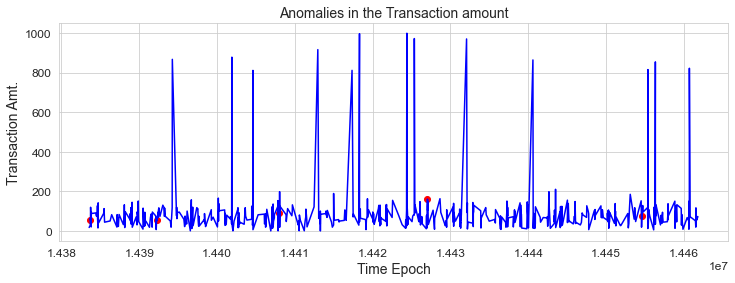

In [52]:
# visualisation of anomaly throughout time (viz 1)
fig, ax = plt.subplots(figsize = (12, 4))

# a = df.loc[df['anomaly'] == 1, ['time_epoch', 'value']] #anomaly
a = df.loc[df['anomaly'] == 1][['time_epoch', 'transaction_dollar_amount']]

ax.plot(df['time_epoch'], df['transaction_dollar_amount'], color='blue')
ax.scatter(a['time_epoch'],a['transaction_dollar_amount'], color='red')
plt.ylabel('Transaction Amt.')
plt.xlabel('Time Epoch')
plt.title('Anomalies in the Transaction amount', fontsize = 14)
plt.show()